# Test using static ocean grid data as metrics for xgcm

This notebook uses static ocean grids from Pangeo Feedstock to assign xgcm metric data to model data.


- [MPI](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/jame.20023) confirmed as Arakawa C-grid
- [NorESM2-LM](https://gmd.copernicus.org/articles/6/687/2013/gmd-6-687-2013.pdf) confirmed as Arakawa C-grid

## Import packages

In [1]:
!pip install cmocean
import cmocean as cmo

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.pyplot as plt
import intake
import gcsfs
from xmip.preprocessing import combined_preprocessing

## MPI-ESM1-2-HR

### Download static ocean grid

In [3]:
store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/CMIP6_static_grids-feedstock/MPI-ESM1-2-HR.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds.parea

<xarray.DataArray 'parea' (y: 385, x: 360)>
dask.array<open_dataset-4a9b2a581eb595ca2b19db6ee6241102parea, shape=(385, 360), dtype=float64, chunksize=(385, 360), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x
Attributes:
    long_name:  Area of p-cells
    units:      m2

### Download CMIP6 model data

In [4]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(table_id=['Omon'], 
                 experiment_id=['historical'],
                 variable_id=['thetao'],
                 member_id=['r1i1p1f1'], 
                 grid_label='gn',
                 source_id=['MPI-ESM1-2-HR']
                )
cmip6_compiled = cat.to_dataset_dict(
    xarray_open_kwargs = {'consolidated':True, 'decode_times': True, 'use_cftime': True},
    # preprocess=combined_preprocessing, 
    aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [5]:
thetao = cmip6_compiled[ 'CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Omon/thetao/gn/v20190710/.nan.20190710'].thetao
thetao

<xarray.DataArray 'thetao' (member_id: 1, dcpp_init_year: 1, time: 1980,
                            lev: 40, j: 404, i: 802)>
dask.array<broadcast_to, shape=(1, 1, 1980, 40, 404, 802), dtype=float32, chunksize=(1, 1, 2, 40, 404, 802), chunktype=numpy.ndarray>
Coordinates:
  * i               (i) int32 0 1 2 3 4 5 6 7 ... 795 796 797 798 799 800 801
  * j               (j) int32 0 1 2 3 4 5 6 7 ... 397 398 399 400 401 402 403
    latitude        (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
  * lev             (lev) float64 6.0 17.0 27.0 ... 4.67e+03 5.17e+03 5.72e+03
    longitude       (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
  * time            (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Diagnostic should be contributed even for models using co...
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

#### _Static ocean and CMIP6 model grid have different dimensions_

## MPI-ESM1-2-LR

### Download static ocean grids

In [6]:
store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/CMIP6_static_grids-feedstock/MPI-ESM1-2-LR.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds.parea

<xarray.DataArray 'parea' (y: 385, x: 360)>
dask.array<open_dataset-0a6d7f872546bac4621c4fa16dfa3ff2parea, shape=(385, 360), dtype=float64, chunksize=(385, 360), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x
Attributes:
    long_name:  Area of p-cells
    units:      m2

### Download CMIP6 model data

In [7]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(table_id=['Omon'], 
                 experiment_id=['historical'],
                 variable_id=['thetao'],
                 member_id=['r1i1p1f1'], 
                 grid_label='gn',
                 source_id=['MPI-ESM1-2-LR']
                )
cmip6_compiled = cat.to_dataset_dict(
    xarray_open_kwargs = {'consolidated':True, 'decode_times': True, 'use_cftime': True},
    #preprocess=combined_preprocessing, 
    aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [8]:
thetao = cmip6_compiled['CMIP.MPI-M.MPI-ESM1-2-LR.historical.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Omon/thetao/gn/v20190710/.nan.20190710'].thetao
thetao

<xarray.DataArray 'thetao' (member_id: 1, dcpp_init_year: 1, time: 1980,
                            lev: 40, j: 220, i: 256)>
dask.array<broadcast_to, shape=(1, 1, 1980, 40, 220, 256), dtype=float32, chunksize=(1, 1, 13, 40, 220, 256), chunktype=numpy.ndarray>
Coordinates:
  * i               (i) int32 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
  * j               (j) int32 0 1 2 3 4 5 6 7 ... 213 214 215 216 217 218 219
    latitude        (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
  * lev             (lev) float64 6.0 17.0 27.0 ... 4.67e+03 5.17e+03 5.72e+03
    longitude       (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
  * time            (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Diagnostic should be contributed even for models using co...
    history:        2019-09-11T14:21:40Z altered by CMOR: replaced missing va...
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

#### _Static ocean and CMIP6 model grid dimensions don't match_

## NorESM2-LM

### Download static ocean grid

In [9]:
store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/CMIP6_static_grids-feedstock/NorESM2-LM.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds

<xarray.Dataset>
Dimensions:  (y: 385, x: 360, nv: 4, pcomp: 86708, qcomp: 88239, ucomp: 88642,
              vcomp: 87942)
Coordinates:
  * pcomp    (pcomp) int32 3667 3668 3670 3671 ... 138558 138559 138560 138561
  * qcomp    (qcomp) int32 3668 3671 3672 3673 ... 138559 138560 138561 138562
  * ucomp    (ucomp) int32 3667 3668 3669 3670 ... 138559 138560 138561 138562
  * vcomp    (vcomp) int32 3667 3668 3670 3671 ... 138559 138560 138561 138562
Dimensions without coordinates: y, x, nv
Data variables: (12/53)
    angle    (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    cplmask  (y, x) int32 dask.array<chunksize=(385, 360), meta=np.ndarray>
    ine      (y, x) int32 dask.array<chunksize=(385, 360), meta=np.ndarray>
    inn      (y, x) int32 dask.array<chunksize=(385, 360), meta=np.ndarray>
    inne     (y, x) int32 dask.array<chunksize=(385, 360), meta=np.ndarray>
    innw     (y, x) int32 dask.array<chunksize=(385, 360), meta=np.ndarray>
    ...       ...
    vdepth   (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    vdx      (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    vdy      (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    vlat     (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    vlon     (y, x) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    vmask    (y, x) int32 dask.array<chunksize=(385, 360), meta=np.ndarray>
Attributes:
    nreg:     2

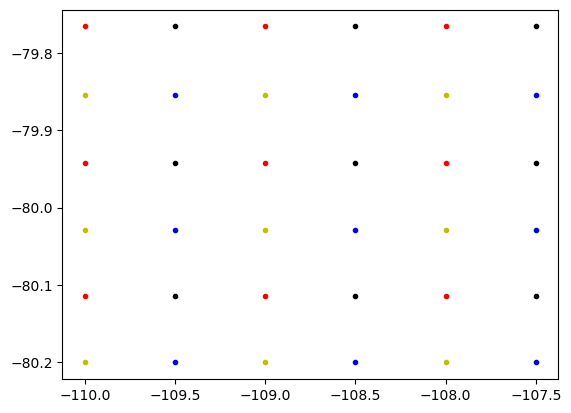

In [10]:
plt.plot(ds['plon'].sel(x=slice(0,3), y=slice(0,3)),ds['plat'].sel(x=slice(0,3), y=slice(0,3)),'.k')
plt.plot(ds['qlon'].sel(x=slice(0,3), y=slice(0,3)),ds['qlat'].sel(x=slice(0,3), y=slice(0,3)),'.y')
plt.plot(ds['ulon'].sel(x=slice(0,3), y=slice(0,3)),ds['ulat'].sel(x=slice(0,3), y=slice(0,3)),'.r')
plt.plot(ds['vlon'].sel(x=slice(0,3), y=slice(0,3)),ds['vlat'].sel(x=slice(0,3), y=slice(0,3)),'.b')

plt.show()

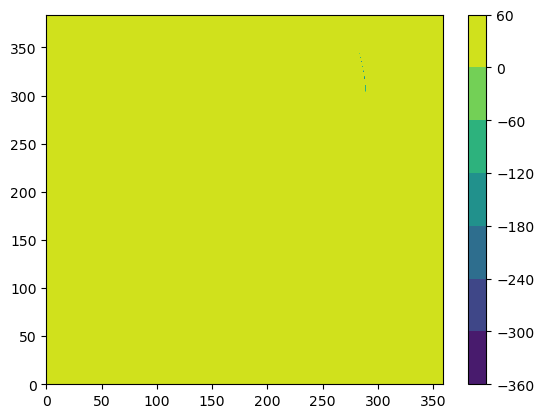

In [11]:
plt.contourf(ds['plon']-ds['ulon'])
plt.colorbar()
# ulon shifted to the right

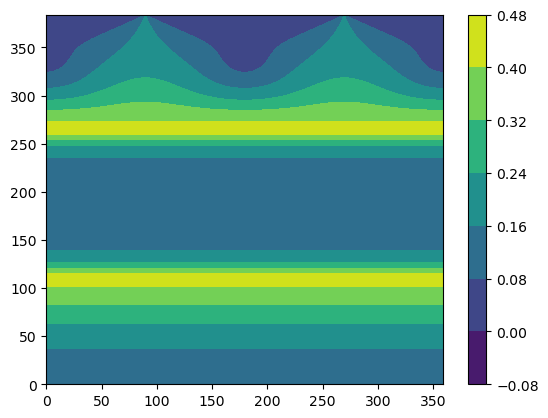

In [12]:
plt.contourf(ds['plat']-ds['vlat'])
plt.colorbar()
# vlon shifted to the right

In [13]:
def preprocess_static_grid_model(ds):
    """
    This function renames variables in static ocean grid dataset to match xmip conventions
    
    ds : xarray Dataset
        Static ocean grid downloaded from Pangeo Forge
    """
    
    ds = ds.rename_vars({'parea':'area_t', 'uarea':'area_u', 'varea':'area_v',
                          'pdx':'dx_t', 'udx':'dx_u', 'vdx':'dx_v',
                          'pdy':'dy_t', 'udy':'dy_u', 'vdy':'dy_v',
                          'pdepth':'dz_t', 'udepth':'dz_u', 'vdepth':'dz_v'
                          })
    
    # area variables
    area_t = ds['area_t']
    area_u = ds['area_u'].rename({'x':'x_r'})
    area_v = ds['area_v'].rename({'y':'y_r'})
    
    dx_t = ds['dx_t']
    dx_u = ds['dx_u'].rename({'x':'x_r'})
    dx_v = ds['dx_v'].rename({'y':'y_r'})
    
    dy_t = ds['dy_t']
    dy_u = ds['dy_u'].rename({'x':'x_r'})
    dy_v = ds['dy_v'].rename({'y':'y_r'})
    
    dz_t = ds['dz_t']
    dz_u = ds['dz_u'].rename({'x':'x_r'})
    dz_v = ds['dy_v'].rename({'y':'y_r'})
    
    coords = {'area_t': area_t, 'area_u': area_u, 'area_v': area_v, 
              'dx_t': dx_t, 'dx_u': dx_u, 'dx_v': dx_v, 
              'dy_t': dy_t, 'dy_u': dy_u, 'dy_v': dy_v,
              'dz_t': dz_t, 'dz_u': dz_u, 'dz_v': dy_v,
             }
    metrics={ ('X','Y'):['area_t','area_u','area_v'], 
             ('X'):['dx_t','dx_u','dx_v'], 
             ('Y'):['dy_t','dy_u','dy_v'], 
             ('Z'):['dz_t','dz_u','dz_v']
            }
    
    return coords, metrics

In [14]:
coords, met_test = preprocess_static_grid_model(ds)

### Download CMIP6 model variables

In [15]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(table_id=['Omon'], 
                 experiment_id=['historical'],
                 variable_id=['thetao','o2','uo','vo'],
                 member_id=['r1i1p1f1'], 
                 grid_label='gr',
                 source_id=['NorESM2-LM']
                )
cmip6_compiled = cat.to_dataset_dict(
    xarray_open_kwargs = {'consolidated':True, 'decode_times': True, 'use_cftime': True},
    preprocess=combined_preprocessing, 
    aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'vo'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'thetao'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'uo'
  warnings.warn(f"Renaming failed with {e}")
/srv/conda/envs/notebook/lib/python3.10/site-packages/xmip/preprocessing.py:106: UserWarning: Renaming failed with 'o2'
  warnings.warn(f"Renaming failed with {e}")


In [16]:
cmip6_compiled.keys()

dict_keys(['CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.thetao.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/thetao/gr/v20190815/.nan.20190815', 'CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.o2.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/o2/gr/v20190815/.nan.20190815', 'CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.uo.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/uo/gr/v20190815/.nan.20190815', 'CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.vo.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/vo/gr/v20190815/.nan.20190815'])

In [17]:
thetao = cmip6_compiled['CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.thetao.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/thetao/gr/v20190815/.nan.20190815'].thetao
o2 = cmip6_compiled['CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.o2.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/o2/gr/v20190815/.nan.20190815'].o2
uo = cmip6_compiled['CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.uo.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/uo/gr/v20190815/.nan.20190815'].uo
vo = cmip6_compiled['CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.vo.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/vo/gr/v20190815/.nan.20190815'].vo

### Plot lat / lon values for each variable to confirm grid placements

In [18]:
diff_thetao = thetao.lon-thetao.lon
diff_o2 = thetao.lon-o2.lon
diff_uo = thetao.lon-uo.lon
diff_vo = thetao.lon-vo.lon

In [19]:
def plot_background(ax):
    ax.set_extent([230., 250., 20., 50.])
    coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='w', facecolor='0.8')
    ax.add_feature(coast_10m)
    return ax

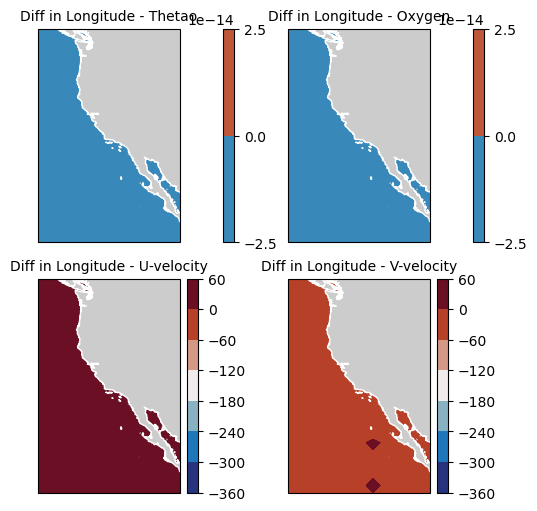

In [20]:
crs = ccrs.PlateCarree()
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(5,5), constrained_layout=True,
                          subplot_kw={'projection': crs})
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

a1 = axlist[0].contourf(diff_thetao, cmap='cmo.balance')
axlist[0].set_title('Diff in Longitude - Thetao', fontsize=10)
ac1 = fig.colorbar(a1, ax=axlist[0])

a2 = axlist[1].contourf(diff_o2, cmap='cmo.balance')
axlist[1].set_title('Diff in Longitude - Oxygen', fontsize=10)
ac2 = fig.colorbar(a2, ax=axlist[1])

a3 = axlist[2].contourf(diff_uo, cmap='cmo.balance')
axlist[2].set_title('Diff in Longitude - U-velocity', fontsize=10)
ac3 = fig.colorbar(a3, ax=axlist[2])

a4 = axlist[3].contourf(diff_vo, cmap='cmo.balance')
axlist[3].set_title('Diff in Longitude - V-velocity', fontsize=10)
ac4 = fig.colorbar(a4, ax=axlist[3])

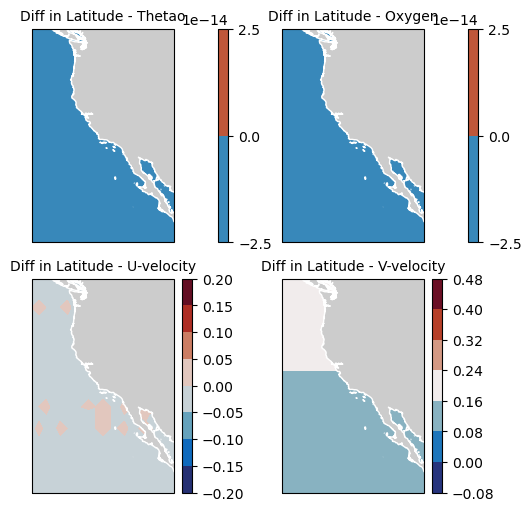

In [21]:
diff_thetao = thetao.lat-thetao.lat
diff_o2 = thetao.lat-o2.lat
diff_uo = thetao.lat-uo.lat
diff_vo = thetao.lat-vo.lat

crs = ccrs.PlateCarree()
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(5,5), constrained_layout=True,
                          subplot_kw={'projection': crs})
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

a1 = axlist[0].contourf(diff_thetao, cmap='cmo.balance')
axlist[0].set_title('Diff in Latitude - Thetao', fontsize=10)
ac1 = fig.colorbar(a1, ax=axlist[0])

a2 = axlist[1].contourf(diff_o2, cmap='cmo.balance')
axlist[1].set_title('Diff in Latitude - Oxygen', fontsize=10)
ac2 = fig.colorbar(a2, ax=axlist[1])

a3 = axlist[2].contourf(diff_uo, cmap='cmo.balance')
axlist[2].set_title('Diff in Latitude - U-velocity', fontsize=10)
ac3 = fig.colorbar(a3, ax=axlist[2])

a4 = axlist[3].contourf(diff_vo, cmap='cmo.balance')
axlist[3].set_title('Diff in Latitude - V-velocity', fontsize=10)
ac4 = fig.colorbar(a4, ax=axlist[3])

### Assign coordinates to variables

In [22]:
thetao.sizes['time']

1980

In [23]:
test = coords['dz_t']

dst = test.expand_dims(time=thetao.time)

In [24]:
dst

<xarray.DataArray 'dz_t' (time: 1980, y: 385, x: 360)>
dask.array<broadcast_to, shape=(1980, 385, 360), dtype=float64, chunksize=(1980, 385, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:  Depth of p-cells
    units:      m

In [25]:
thetao = thetao.assign_coords(area_t = coords['area_t'].fillna(0),
                             dx_t = coords['dx_t'].fillna(0),
                             dy_t = coords['dy_t'].fillna(0), 
                             dz_t = coords['dz_t'].expand_dims(time=thetao.time).fillna(0), 
                             )

In [26]:
o2 = o2.assign_coords(area_t = coords['area_t'].fillna(0),
                             dx_t = coords['dx_t'].fillna(0),
                             dy_t = coords['dy_t'].fillna(0),
                             dz_t = coords['dz_t'].expand_dims(time=o2.time).fillna(0), 
                             )

In [28]:
uo = uo.rename({'x':'x_r','lon':'lon_u', 'lat':'lat_u'}).assign_coords(area_u = coords['area_u'].fillna(0),
                                                                         dx_u = coords['dx_u'].fillna(0),
                                                                         dy_u = coords['dy_u'].fillna(0), 
                                                                         dz_u = coords['dz_u'].expand_dims(time=uo.time).fillna(0)
                                                                         )

In [29]:
vo = vo.rename({'y':'y_r','lon':'lon_v', 'lat':'lat_v'}).assign_coords(area_v = coords['area_v'].fillna(0),
                                                                         dx_v = coords['dx_v'].fillna(0),
                                                                         dy_v = coords['dy_v'].fillna(0),
                                                                         dz_v = coords['dz_v'].expand_dims(time=vo.time).fillna(0)
                                                                         )

### Subset CCS domain

In [30]:
lat_north = 50
lat_south = 25
lon_west = -130+360
lon_east = -110.75+360

subset_thetao = thetao.where((thetao.lat > lat_south) & (thetao.lat < lat_north) & (thetao.lon > lon_west) & (thetao.lon < lon_east), drop=True)
subset_uo = uo.where((uo.lat_u > lat_south) & (uo.lat_u < lat_north) & (uo.lon_u > lon_west) & (uo.lon_u < lon_east), drop=True)
subset_vo = vo.where((vo.lat_v > lat_south) & (vo.lat_v < lat_north) & (vo.lon_v > lon_west) & (vo.lon_v < lon_east), drop=True)
subset_o2 = o2.where((o2.lat > lat_south) & (o2.lat < lat_north) & (o2.lon > lon_west) & (o2.lon < lon_east), drop=True)

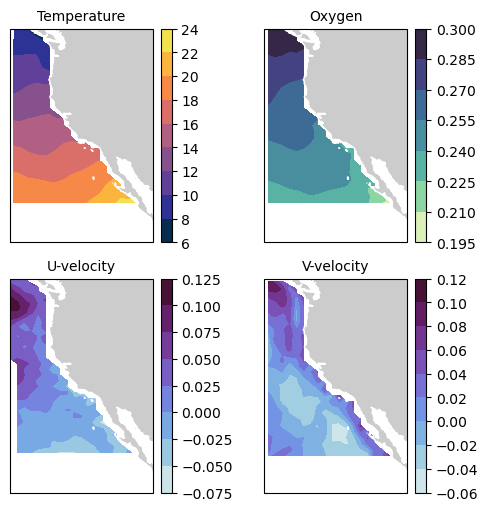

In [31]:
crs = ccrs.PlateCarree()
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(5,5), constrained_layout=True,
                          subplot_kw={'projection': crs})
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

a1 = axlist[0].contourf(subset_thetao.lon,subset_thetao.lat,subset_thetao.isel(lev=0,time=0).squeeze(), cmap='cmo.thermal')
axlist[0].set_title('Temperature', fontsize=10)
ac1 = fig.colorbar(a1, ax=axlist[0])

a2 = axlist[1].contourf(subset_o2.lon,subset_o2.lat,subset_o2.isel(lev=0,time=0).squeeze(), cmap='cmo.deep')
axlist[1].set_title('Oxygen', fontsize=10)
ac2 = fig.colorbar(a2, ax=axlist[1])

a3 = axlist[2].contourf(subset_uo.lon_u,subset_uo.lat_u,subset_uo.isel(lev=0,time=0).squeeze(), cmap='cmo.dense')
axlist[2].set_title('U-velocity', fontsize=10)
ac3 = fig.colorbar(a3, ax=axlist[2])

a4 = axlist[3].contourf(subset_vo.lon_v,subset_vo.lat_v,subset_vo.isel(lev=0,time=0).squeeze(), cmap='cmo.dense')
axlist[3].set_title('V-velocity', fontsize=10)
ac4 = fig.colorbar(a4, ax=axlist[3])

In [32]:
ds_subset = xr.merge([subset_thetao, subset_o2, subset_uo, subset_vo], compat='override')
ds_subset

<xarray.Dataset>
Dimensions:         (x: 19, y: 34, lev: 70, time: 1980, member_id: 1,
                     dcpp_init_year: 1, x_r: 20, y_r: 35)
Coordinates: (12/26)
  * x               (x) int32 341 342 343 344 345 346 ... 355 356 357 358 359
  * y               (y) int32 261 262 263 264 265 266 ... 290 291 292 293 294
    lat             (y, x) float64 dask.array<chunksize=(34, 19), meta=np.ndarray>
  * lev             (lev) float64 0.0 5.0 10.0 ... 6.25e+03 6.5e+03 6.75e+03
    lon             (y, x) float64 dask.array<chunksize=(34, 19), meta=np.ndarray>
  * time            (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    ...              ...
    lat_v           (y_r, x) float64 dask.array<chunksize=(35, 19), meta=np.ndarray>
    lon_v           (y_r, x) float64 dask.array<chunksize=(35, 19), meta=np.ndarray>
    area_v          (y_r, x) float64 dask.array<chunksize=(35, 19), meta=np.ndarray>
    dx_v            (y_r, x) float64 dask.array<chunksize=(35, 19), meta=np.ndarray>
    dy_v            (y_r, x) float64 dask.array<chunksize=(35, 19), meta=np.ndarray>
    dz_v            (time, y_r, x) float64 dask.array<chunksize=(1980, 35, 19), meta=np.ndarray>
Data variables:
    thetao          (member_id, dcpp_init_year, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 4, 70, 34, 19), meta=np.ndarray>
    o2              (member_id, dcpp_init_year, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 4, 70, 34, 19), meta=np.ndarray>
    uo              (member_id, dcpp_init_year, time, lev, y, x_r) float32 dask.array<chunksize=(1, 1, 3, 70, 34, 20), meta=np.ndarray>
    vo              (member_id, dcpp_init_year, time, lev, y_r, x) float32 dask.array<chunksize=(1, 1, 3, 70, 35, 19), meta=np.ndarray>
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Diagnostic should be contributed even for models using co...
    history:        2019-08-15T19:34:38Z altered by CMOR: Converted type from...
    long_name:      Sea Water Potential Temperature
    original_name:  templvl
    standard_name:  sea_water_potential_temperature
    units:          °C

### Create grid object for NorESM2-LM data

In [33]:
from xgcm import Grid

In [34]:
grid = Grid(
    ds_subset,
    coords={
        'X':{'center':'x', 'right':'x_r'},
        'Y':{'center':'y', 'right':'y_r'},
        'Z':{'center':'lev'},
    },
    periodic=False,
    boundary='extend',
    metrics=met_test
)

In [35]:
grid._metrics

{frozenset({'X',
            'Y'}): [<xarray.DataArray 'area_t' (y: 34, x: 19)>
  dask.array<getitem, shape=(34, 19), dtype=float64, chunksize=(34, 19), chunktype=numpy.ndarray>
  Coordinates:
    * x        (x) int32 341 342 343 344 345 346 347 ... 354 355 356 357 358 359
    * y        (y) int32 261 262 263 264 265 266 267 ... 289 290 291 292 293 294
  Attributes:
      long_name:  Area of p-cells
      units:      m2, <xarray.DataArray 'area_u' (y: 34, x_r: 20)>
  dask.array<getitem, shape=(34, 20), dtype=float64, chunksize=(34, 20), chunktype=numpy.ndarray>
  Coordinates:
    * y        (y) int32 261 262 263 264 265 266 267 ... 289 290 291 292 293 294
    * x_r      (x_r) int32 341 342 343 344 345 346 347 ... 355 356 357 358 359 360
  Attributes:
      long_name:  Area of u-cells
      units:      m2, <xarray.DataArray 'area_v' (y_r: 35, x: 19)>
  dask.array<getitem, shape=(35, 19), dtype=float64, chunksize=(35, 19), chunktype=numpy.ndarray>
  Coordinates:
    * x        (x) int32 

### Use grid for xgcm calculations

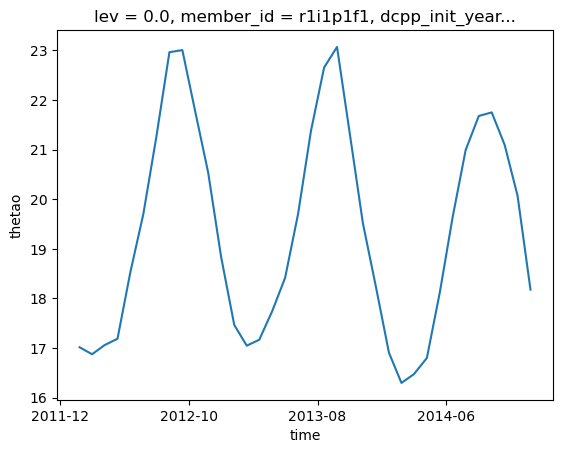

In [36]:
lev_layer = 0
time_start='2012-01-01'
time_end='2014-12-31'

mean_sst = grid.average(ds_subset.thetao.isel(lev=lev_layer).sel(time=slice(time_start,time_end)).squeeze(),['X','Y'])
mean_sst.plot()

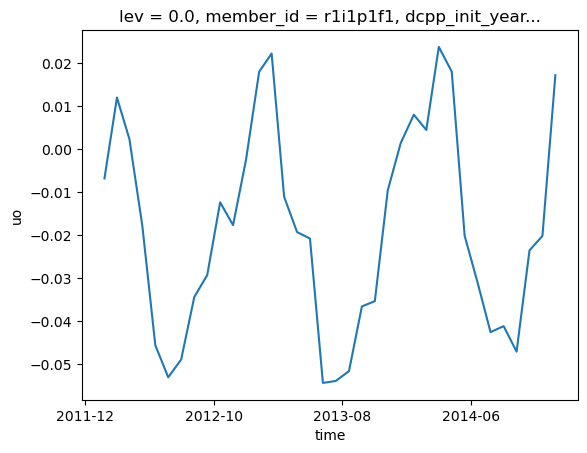

In [37]:
mean_uo = grid.average(ds_subset.uo.isel(lev=lev_layer).sel(time=slice(time_start,time_end)).squeeze(),['X','Y'])
mean_uo.plot()

### Try other metric combinations

In [38]:
# Calculate section data
section0 = ds_subset.uo.isel(x_r=0).sel(time=slice(time_start,time_end)).squeeze()
section0

<xarray.DataArray 'uo' (time: 36, lev: 70, y: 34)>
dask.array<getitem, shape=(36, 70, 34), dtype=float32, chunksize=(3, 70, 34), chunktype=numpy.ndarray>
Coordinates:
  * y               (y) int32 261 262 263 264 265 266 ... 290 291 292 293 294
  * lev             (lev) float64 0.0 5.0 10.0 ... 6.25e+03 6.5e+03 6.75e+03
  * time            (time) object 2012-01-16 12:00:00 ... 2014-12-16 12:00:00
    member_id       <U8 'r1i1p1f1'
    dcpp_init_year  float64 nan
    x_r             int32 341
    lat_u           (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
    lon_u           (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
    area_u          (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
    dx_u            (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
    dy_u            (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
    dz_u            (time, y) float64 dask.array<chunksize=(36, 34), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    comment:        Prognostic x-ward velocity component resolved by the model.
    history:        2019-08-15T20:03:05Z altered by CMOR: Converted type from...
    long_name:      Sea Water X Velocity
    original_name:  uvellvl
    standard_name:  sea_water_x_velocity
    units:          m/s

/srv/conda/envs/notebook/lib/python3.10/site-packages/xgcm/grid.py:1669: UserWarning: Metric at ('time', 'lev', 'y') being interpolated from metrics at dimensions [('y', 'x'), ('time', 'y', 'x')]. Boundary value set to 'extend'.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/xgcm/grid.py:1669: UserWarning: Metric at ('time', 'lev', 'y') being interpolated from metrics at dimensions [('y', 'x'), ('time', 'y', 'x_r')]. Boundary value set to 'extend'.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/xgcm/grid.py:1669: UserWarning: Metric at ('time', 'lev', 'y') being interpolated from metrics at dimensions [('y', 'x'), ('time', 'y_r', 'x')]. Boundary value set to 'extend'.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/xgcm/grid.py:1669: UserWarning: Metric at ('time', 'lev', 'y') being interpolated from metrics at dimensions [('y', 'x_r'), ('time', 'y', 'x')]. Boundary value set to 'extend'.
  warnings.warn(
/srv/conda

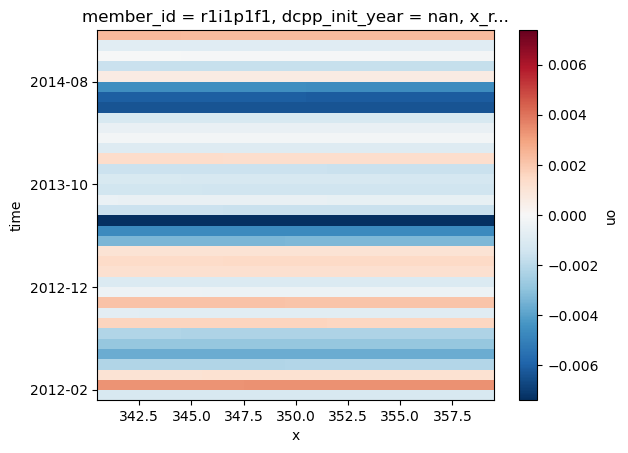

In [39]:
mean_uo = grid.average(ds_subset.uo.isel(x_r=0).sel(time=slice(time_start,time_end)).squeeze(),['Y','Z'])
mean_uo.plot()

**_Depth metrics lack third dimension, i.e., dz_t only has y,x coordinates_**